In [1]:
# HIDDEN
import sys
sys.path.insert(0, "/Users/blankjul/workspace/pyrecorder")

# pyrecorder

In [18]:
%%HTML

<!-- <div align="center">
<img src="_static/pyrecorder.png" width="300px" height="300px" alt="logo">
</div>
-->

In [19]:
%%HTML

<div  align="middle">
<video width="100%" height="auto" controls>
  <source src="https://www.egr.msu.edu/coinlab/blankjul/pyrecorder.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>
</div>

# Installation

The framework is available at the PyPi Repository:

# Output

## GIF

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from pyrecorder.video import Video
from pyrecorder.recorders.gif import GIF

vid = Video(GIF("example.gif"))

for k in range(10):
    X = np.random.random((100, 2))
    plt.scatter(X[:, 0], X[:, 1])
    vid.record()

vid.close()

Now you can check out the `GIF` file or also render it in `Jupyter` with

```
from pyrecorder.video import load
load("example.gif")
```

The resulting animation looks as follows:


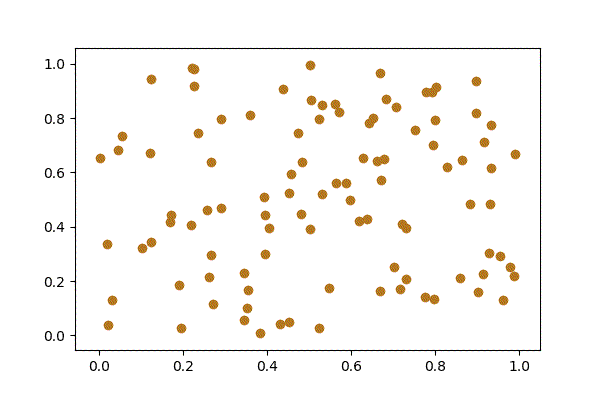

In [4]:
from pyrecorder.video import load
from pyrecorder.recorders.html import to_html
to_html("example.gif", "example_gif.html", format="image/gif", embedded=True)
load("example_gif.html")

## Video

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from pyrecorder.video import Video
from pyrecorder.recorders.file import File

vid = Video(File("example.mp4"))

for k in range(10):
    X = np.random.random((100, 2))
    plt.scatter(X[:, 0], X[:, 1])
    vid.record()

vid.close()

The file has been stored to the provided path. You can also render the video in `Jupyter` with

```
from pyrecorder.video import load
load("example.mp4")
```

The resulting animation looks as follows:

In [6]:
from pyrecorder.video import load
from pyrecorder.recorders.html import to_html
to_html("example.mp4", "example_mp4.html", format="video/mp4", embedded=True)
load("example_mp4.html")

## Converter

### Matplotlib

Examples are shown above.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from pyrecorder.converters.matplotlib import Matplotlib
from pyrecorder.recorders.file import File
from pyrecorder.video import Video

fname = "example_matplotlib.mp4"
    
with Video(File(fname), converter=Matplotlib()) as vid:

    for k in range(10):
        fig, (ax1, ax2) = plt.subplots(2)

        X = np.random.random((100, 2))
        ax1.scatter(X[:, 0], X[:, 1], color="green")
        
        X = np.random.random((100, 2))
        ax2.scatter(X[:, 0], X[:, 1], color="red")
        
        vid.record(fig=fig)

In [8]:
from pyrecorder.video import load
from pyrecorder.recorders.html import to_html
to_html("example_matplotlib.mp4", "example_matplotlib.html", format="video/mp4", embedded=True)
load("example_matplotlib.html")

### Plotly

For plotly some more libraries need to be installed:
    
```
pip install plotly psutil requests pandas
```

and also to convert the graphics to images

```
conda install plotly-orca
```

then the recording looks as follows:

In [2]:
import numpy as np
import plotly.express as px

from pyrecorder.converters.plotly import Plotly
from pyrecorder.recorders.file import File
from pyrecorder.video import Video

fname = "example_plotly.mp4"
df = px.data.iris()
    
with Video(File(fname), converter=Plotly()) as vid:

    for k in range(10):
        rnd = np.random.rand(len(df)) < 0.7
        fig = px.scatter(df.loc[rnd], x="sepal_width", y="sepal_length", color="species", size='petal_length')
        vid.record(fig=fig)

In [3]:
from pyrecorder.video import load
from pyrecorder.recorders.html import to_html
to_html("example_plotly.mp4", "example_plotly.html", format="video/mp4", embedded=True)
load("example_plotly.html")

# Contact